**Import the libraries**

In [1]:
# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load the dataset**

In [2]:
# load the CancerDataset.csv file
df = pd.read_csv('CancerDataset.csv')


Use **df.head(n)** to display the first n rows of the dataframe.  

In [3]:
df.head(2)

,TumorSize,TumorDensity,CancerDetected
0,19,19000,0
1,35,20000,0


Use **df.tail(n)** to display the last n rows of the dataframe.  

In [4]:
df.tail(2)

,TumorSize,TumorDensity,CancerDetected
398,36,33000,0
399,49,36000,1


In [5]:
df.shape

(400, 3)

**Visualize the data**  
A dataframe can be filterd using Boolean Indexing.  
  
To filter all the rows that have CancerDetected as 1, we can apply the filter as **df[df.CancerDetected == 1]**  
To filter all the rows that have CancerDetected as 0, we can apply the filter as **df[df.CancerDetected == 0]**  

In [6]:
cancer_data = df[df.CancerDetected == 1]
non_cancer_data = df[df.CancerDetected == 0]

Text(0, 0.5, 'Tumor Density')

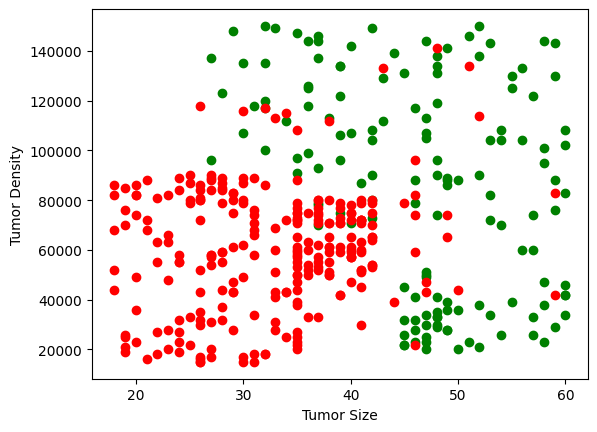

In [11]:
# Plot the scatter diagram
plt.scatter(cancer_data.TumorSize, cancer_data.TumorDensity, color='green')
plt.scatter(non_cancer_data.TumorSize, non_cancer_data.TumorDensity, color='red')
plt.xlabel('Tumor Size')
plt.ylabel('Tumor Density')

**Split the dataset into X and y**  
***X*** is the input feature (years of exp) and ***y*** is the target variable that we are trying to predict (salary)  

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape, y.shape

((400, 2), (400,))

**Splitting the dataset into the Training set and Test set**

In [14]:
# import train_test_split from sklearn.model_selection and train the dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 2), (320,), (80, 2), (80,))

**Feature Scaling**  
Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale.  
This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model.  
  
Feature scaling is essential when working with datasets where the features have different ranges, units of measurement, or orders of magnitude.  
  
Common feature scaling techniques include standardization, normalization, and min-max scaling. 

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # note that we apply both fit and transform only to the training data
X_test = sc.transform(X_test) # note here that w are only applying the transform function here, and not the fit function

In [17]:
print(X_train)
print(X_test)

[[ 1.56942120e+00  1.19610410e+00]
 [-1.08128831e+00 -1.13976621e+00]
 [ 8.12075623e-01  5.97162999e-01]
 [ 7.17407427e-01 -1.37934265e+00]
 [-1.08128831e+00 -1.58897204e+00]
 [-2.29274539e-01 -9.16192722e-02]
 [ 7.17407427e-01 -6.90560378e-01]
 [ 2.04276218e+00 -7.80401543e-01]
 [-4.18610932e-01 -1.19966032e+00]
 [ 2.44066444e-01 -2.41354549e-01]
 [-8.91951914e-01 -2.71301604e-01]
 [-2.29274539e-01 -3.31195714e-01]
 [ 1.00141202e+00  2.09451576e+00]
 [ 5.47300511e-02 -2.11407493e-01]
 [-7.97283718e-01 -2.11407493e-01]
 [ 2.13743038e+00  4.47427723e-01]
 [-1.34606342e-01 -4.80930991e-01]
 [ 2.44066444e-01  2.21430398e+00]
 [-1.08128831e+00 -1.52907793e+00]
 [-7.97283718e-01  2.39398632e+00]
 [ 1.28541661e+00  1.97472754e+00]
 [-3.99381454e-02  1.18010115e-01]
 [ 1.94809398e+00 -9.00189764e-01]
 [ 1.00141202e+00 -1.16971326e+00]
 [ 2.13743038e+00  1.19610410e+00]
 [ 1.75875759e+00 -2.41354549e-01]
 [-1.34606342e-01  2.07851280e-01]
 [-2.29274539e-01 -2.71301604e-01]
 [ 1.47475300e+00  4

**Training the Logistic Regression model on the Training set**

In [19]:
# Load the LogisticRegression from sklearn.linear_model and fit the data
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

**Predicting the Test set results**

In [20]:
# Make predictions with test data
y_pred = classifier.predict(X_test)

# Evaluating the model
**Accuracy**  
Accuracy is the percentage of the predictions that are correct  


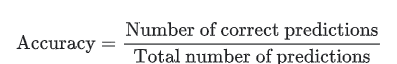

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7125

**Confusion Matrix**  


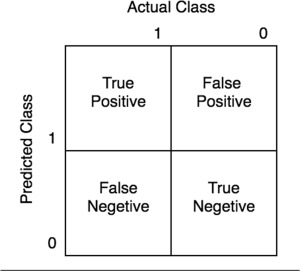

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[36  4]
 [19 21]]


Text(50.722222222222214, 0.5, 'Predicted Class')

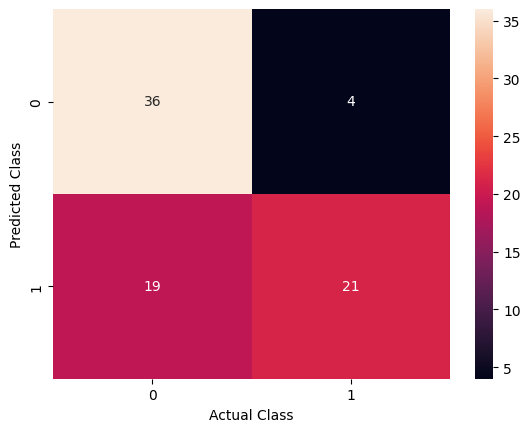

In [23]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')